# Open qubit dynamics

We consider a two-level quantum system (qubit) in an open system described by a density matrix $\rho$. When the dynamics are Markovian (and time homogeneous), we can write an equation of motion for $\rho$ as simply $\partial_t \rho = \mathcal{L}[\rho]$, where $\mathcal{L}$ is a mathematical object called *the Lindbladian* that satisfies the Gorini-Kossakowski-Surdarshan-Lindblad equation ($\hbar = 1$)

$$\mathcal{L}[\rho] = - i [H, \rho] + \sum_k \gamma_k \left( \text{J}_k \rho \text{J}_k^\dagger -\frac{1}{2}\{\text{J}_k^\dagger \text{J}_k,\rho\}\right).$$

Here $H$ is the Hamiltonian, $\gamma_k \geq 0$ are dissipation rates and $J_k$ are jump operators. Without loss of generality, we take $\text{H} = \omega \sigma_z/2$, where $\sigma_z$ is the z-Pauli operator, and label its eigenstates according to $\sigma_z |0\rangle = |0\rangle, ~ \sigma_z |1\rangle = - |1 \rangle$. Also, we specify the measurement $\text{M}$ to have the eigenstates $|m_+\rangle=\cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle$ and $|m_-\rangle = -\sin(\theta/2)|0\rangle + \cos(\theta/2)|1\rangle$, where $\theta\in[0,\pi]$, and we chose the target state $|m_\star\rangle = |m_+\rangle$.

We are interested in the following two questions: 

(1) What is the mean detection time of target state $|m_\star\rangle$ given that we start from $|m_\star\rangle$? This mean time we call $T_\star$.

(2) What is the mean detection time of target state $|m_\star\rangle$ given that we start from the orthogonal state to $|m_\star\rangle$? This mean time we call $T_{\text{switch}}$.

The results can be derived in an analytic way and can be found in our paper https://arxiv.org/pdf/2011.04403.pdf. In the following we will state the analytic results and verify them using numerical simulations.

## Unitary Dynamics

This case amounts to taking $\gamma_k = 0$, in which we recover the usual $\partial_t \rho = - i [H, \rho]$. The results are

$$T_\star = 2 \tau, \qquad T_{\text{switch}} = \frac{2\tau}{\sin^2(\theta)}\left(1+\frac{1}{(\omega\tau)^2}\right)$$

## Unital Dynamics Under Dephasing Noise

Such an evolution is described by $\mathcal{L}[\rho] = -i\frac{\omega}{2}[\sigma_z,\rho] + \gamma (\sigma_z \rho \sigma_z - \rho)$, where we have chosen a single $\gamma$. The results now read

$$T_\star = 2 \tau, \qquad T_{\text{switch}} = \frac{2\tau}{\sin ^2(\theta)}\frac{\left((2 \gamma  \tau +1)^2+ (\omega\tau)^2 \right)}{(2\gamma
   \tau)^2 +2\gamma\tau +(\omega\tau)^2}$$

## Non-Unital Dynamics

The last case we consider is that of non-unital dynamics (spontaneous decay), described by $\mathcal{L}[\rho] = -i\frac{\omega}{2}[\sigma_z,\rho] + \gamma (\sigma_- \rho \sigma_-^\dagger - \frac{1}{2}\{\sigma_-^\dagger \sigma_-,\rho\})$, where $\text{J}_1 = \sigma_- = |1\rangle \langle 0|$ is the jump operator. The results now are

$$T_\star = \tau  \left(1+\frac{\cot ^2\left(\frac{\theta }{2}\right) \left(\cos (\theta ) \left(\gamma\tau
    (\gamma  \tau +2)-(2\omega\tau)^2\right)+(\gamma  \tau +1) \left(\gamma\tau  (\gamma 
   \tau +2)+(2 \omega \tau)^2\right)\right)}{(\gamma \tau +1) \left(\gamma \tau (\gamma 
   \tau +2)+ (2\omega\tau)^2 \right)-\cos (\theta ) \left(\gamma\tau (\gamma \tau +2)-(2
  \omega\tau)^2\right)}\right)$$
  
$$T_{\text{switch}} = \tau \frac{(\gamma  \tau +1) \csc ^2\left(\frac{\theta }{2}\right) \left((\gamma  \tau +2)^2+
   (2\omega\tau)^2 \right)}{(\gamma  \tau +1) \left(\gamma\tau  (\gamma  \tau +2)+(2\omega\tau) ^2\right)-\cos (\theta ) \left(\gamma  (\gamma \tau +2)-(2\omega\tau
   )^2\right)}$$



In [32]:
import numpy as np
from scipy.linalg import expm

In [33]:
def unital_time_evolve(state, t, w, g):
    
    """Takes state and evolves it by unital
       operator L for time t"""
    
    L = np.array([[0, 0, 0, 0], [0, -2.*g - 1j*w, 0, 0],
                  [0, 0, -2.*g + 1j*w, 0], [0, 0, 0, 0]])
    
    return expm(L*t)@state

def non_unital_time_evolve(state, t, w, g):
    
    """Takes state and evolves it by non-unital
       operator L for time t"""
    
    L = np.array([[-g, 0, 0, 0], [0, -.5*g - 1j*w, 0, 0],
                  [0, 0, -.5*g + 1j*w, 0], [g, 0, 0, 0]])
    
    return expm(L*t)@state

def m(theta, sign):
    
    """Returns super-state corresponding to 
       single qubit state |m_sign (theta)>"""
    
    if sign == '+':
        
        return np.array([np.cos(0.5*theta)**2, 0.5*np.sin(theta), 0.5*np.sin(theta), np.sin(0.5*theta)**2])
    
    elif sign == '-':
        
        return np.array([np.sin(0.5*theta)**2, -0.5*np.sin(theta), -0.5*np.sin(theta), np.cos(0.5*theta)**2])
    

def probs(state):
    
    """Takes a state and returns the probabilities 
       of measuring state m(theta,+) and m(theta, -)"""
    
    p = np.zeros(2)
    
    mp = m(theta, '+')
    mm = m(theta, '-')
    
    p[0] = np.dot(mp.conj().T, state)
    p[1] = np.dot(mm.conj().T, state)
    
    return p

def measure(state):
    
    """Measures input state and outputs measured state and its label"""
    
    p = probs(state)
    choice = np.random.choice(2, p=p.tolist())
    
    if choice == 0:
        # This is m+
        return [m(theta, '+'), '+']
    elif choice == 1:
        # This is m-
        return [m(theta, '-'), '-']

    
def time_evolution(evolution, in_state, t):
    
    """Evolves in_state for time t and returns final state"""
    
    if evolution == 'unitary':
        
        # Make sure that gamma = 0 for unitary
        psi = unital_time_evolve(in_state, t, w, 0)
            
    elif evolution == 'unital':

        psi = unital_time_evolve(in_state, t, w, g)

    elif evolution == 'non-unital':

        psi = non_unital_time_evolve(in_state, t, w, g)
        
    return psi


def Tstar(theta, target_state, tau, omega, gamma, evolution, ntimes):
    
    """Returns T_* assuming exponential pdf with mean tau"""
    
    T_list = []
    
    for n in range(ntimes):
        
        t_list = []

        # Sample measuring time from pdf
        t = np.random.exponential(tau)
        t_list.append(t)

        # Prepare initial state
        psi0 = m(theta, target_state)
        
        # Evolve for time t
        psi = time_evolution(evolution, psi0, t)

        # Measure state at time t
        psi, lf = measure(psi)
        

        # Iterate until you find target state
        while lf != target_state:
            
            t = np.random.exponential(tau)
            t_list.append(t)

            psi = time_evolution(evolution, psi, t)

            psi, lf = measure(psi)

        T = sum(t_list)
        T_list.append(T)

    T = np.array(T_list)
    Ts = np.mean(T)
    
    return Ts

def Tswitch(theta, target_state, tau, omega, gamma, evolution, ntimes):
    
    """Returns T_switch assuming exponential pdf with mean tau"""
    
    T_list = []
    
    for n in range(ntimes):
        
        t_list = []

        # Sample measuring time from pdf
        t = np.random.exponential(tau)
        t_list.append(t)

        # Prepare initial state
        if target_state == '+':
            psi0 = m(theta, '-')
        elif target_state == '-':
            psi0 = m(theta, '+')
        
        # Evolve for time t
        psi = time_evolution(evolution, psi0, t)

        # Measure state at time t
        psi, lf = measure(psi)
        

        # Iterate until you find target state
        while lf != target_state:
            
            t = np.random.exponential(tau)
            t_list.append(t)

            psi = time_evolution(evolution, psi, t)

            psi, lf = measure(psi)

        T = sum(t_list)
        T_list.append(T)

    T = np.array(T_list)
    Ts = np.mean(T)
    
    return Ts

### Unitary: Results

In [34]:
tau = 1
w = 1 # omega
g = 0 # gamma
theta_list_star = np.arange(0.05, 0.95*np.pi, 0.05)
target_state = '+'
ntimes = 1000
evolution = 'unitary'
Tstar_list = []

for j in range(len(theta_list_star)):
    
    theta = theta_list_star[j]

    Ts = Tstar(theta, target_state, tau, w, g, evolution, ntimes)
    
    Tstar_list.append(Ts)

    print('theta:', round(theta, 4),'T*:', round(Ts, 4))

<ipython-input-33-5f814e680b76>:45: ComplexWarning: Casting complex values to real discards the imaginary part
  p[0] = np.dot(mp.conj().T, state)
<ipython-input-33-5f814e680b76>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  p[1] = np.dot(mm.conj().T, state)


theta: 0.05 T*: 1.0707
theta: 0.1 T*: 1.5353
theta: 0.15 T*: 1.6428
theta: 0.2 T*: 2.1565
theta: 0.25 T*: 1.4448
theta: 0.3 T*: 1.9912
theta: 0.35 T*: 1.8894
theta: 0.4 T*: 1.9005
theta: 0.45 T*: 1.677
theta: 0.5 T*: 1.7504
theta: 0.55 T*: 1.6918
theta: 0.6 T*: 1.9497
theta: 0.65 T*: 2.0151
theta: 0.7 T*: 1.9091
theta: 0.75 T*: 2.0447
theta: 0.8 T*: 2.0114
theta: 0.85 T*: 2.0972
theta: 0.9 T*: 2.1213
theta: 0.95 T*: 2.0703
theta: 1.0 T*: 2.082
theta: 1.05 T*: 2.0831
theta: 1.1 T*: 2.083
theta: 1.15 T*: 1.8591
theta: 1.2 T*: 2.1976
theta: 1.25 T*: 1.9425
theta: 1.3 T*: 1.9478
theta: 1.35 T*: 1.8845
theta: 1.4 T*: 1.9428
theta: 1.45 T*: 2.2258
theta: 1.5 T*: 1.9909
theta: 1.55 T*: 1.8871
theta: 1.6 T*: 2.113
theta: 1.65 T*: 1.9324
theta: 1.7 T*: 2.0715
theta: 1.75 T*: 2.0822
theta: 1.8 T*: 2.0587
theta: 1.85 T*: 2.0382
theta: 1.9 T*: 2.1129
theta: 1.95 T*: 2.004
theta: 2.0 T*: 2.3266
theta: 2.05 T*: 1.9958
theta: 2.1 T*: 2.015
theta: 2.15 T*: 2.0326
theta: 2.2 T*: 1.98
theta: 2.25 T*: 1.

In [35]:
tau = 1
w = 1 # omega
g = 0 # gamma
theta_list_switch = np.arange(0.25, 0.85*np.pi, 0.1)
target_state = '+'
ntimes = 1000
evolution = 'unitary'
Tswitch_list = []

for j in range(len(theta_list_switch)):
    
    theta = theta_list_switch[j]

    Ts = Tswitch(theta, target_state, tau, w, g, evolution, ntimes)
    
    Tswitch_list.append(Ts)

    print('theta:', round(theta, 4),'T-:', round(Ts, 4))

<ipython-input-33-5f814e680b76>:45: ComplexWarning: Casting complex values to real discards the imaginary part
  p[0] = np.dot(mp.conj().T, state)
<ipython-input-33-5f814e680b76>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  p[1] = np.dot(mm.conj().T, state)


theta: 0.25 T-: 65.3366
theta: 0.35 T-: 33.254
theta: 0.45 T-: 21.0271
theta: 0.55 T-: 14.6604
theta: 0.65 T-: 11.0975
theta: 0.75 T-: 8.5555
theta: 0.85 T-: 7.0058
theta: 0.95 T-: 5.8918
theta: 1.05 T-: 5.0636
theta: 1.15 T-: 5.0283
theta: 1.25 T-: 4.4514
theta: 1.35 T-: 4.2327
theta: 1.45 T-: 4.0772
theta: 1.55 T-: 3.9715
theta: 1.65 T-: 3.9897
theta: 1.75 T-: 4.2061
theta: 1.85 T-: 4.2567
theta: 1.95 T-: 4.9765
theta: 2.05 T-: 5.1846
theta: 2.15 T-: 5.5924
theta: 2.25 T-: 6.4731
theta: 2.35 T-: 7.8985
theta: 2.45 T-: 10.3995
theta: 2.55 T-: 12.3851
theta: 2.65 T-: 17.4168


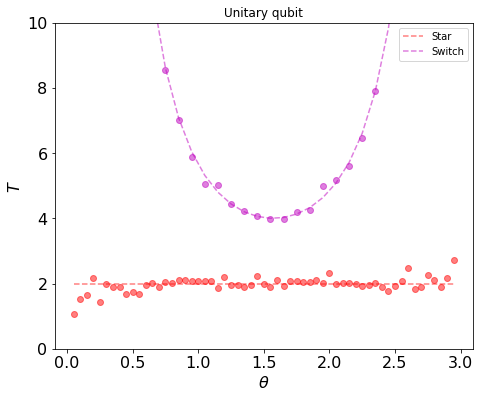

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7.5, 6.))
plt.plot(theta_list_star, 2*np.ones(len(theta_list_star)), 'r--', alpha = 0.5, label = 'Star')
plt.plot(theta_list_star, Tstar_list, 'ro', alpha = 0.5)
plt.plot(theta_list_switch, 4./np.sin(theta_list_switch)**2, 'm--', alpha = 0.5, label = 'Switch')
plt.plot(theta_list_switch, Tswitch_list, 'mo', alpha = 0.5)
plt.title('Unitary qubit')
plt.xlabel(r'$\theta$', fontsize = 16)
plt.ylabel(r'$T$', fontsize = 16)
plt.tick_params(axis = 'x', labelsize = 16)
plt.tick_params(axis = 'y', labelsize = 16)
plt.ylim([0, 10])
plt.legend()


### Unital: Results

In [37]:
tau = 1
w = 1 # omega
g = 1 # gamma
theta_list_star = np.arange(0.05, 0.95*np.pi, 0.05)
target_state = '+'
ntimes = 1000
evolution = 'unital'
Tstar_list = []

for j in range(len(theta_list_star)):
    
    theta = theta_list_star[j]

    Ts = Tstar(theta, target_state, tau, w, g, evolution, ntimes)
    
    Tstar_list.append(Ts)

    print('theta:', round(theta, 4),'T*:', round(Ts, 4))

<ipython-input-33-5f814e680b76>:45: ComplexWarning: Casting complex values to real discards the imaginary part
  p[0] = np.dot(mp.conj().T, state)
<ipython-input-33-5f814e680b76>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  p[1] = np.dot(mm.conj().T, state)


theta: 0.05 T*: 2.3762
theta: 0.1 T*: 2.7803
theta: 0.15 T*: 2.2912
theta: 0.2 T*: 1.5849
theta: 0.25 T*: 2.4206
theta: 0.3 T*: 1.912
theta: 0.35 T*: 2.2555
theta: 0.4 T*: 2.1369
theta: 0.45 T*: 2.191
theta: 0.5 T*: 2.1243
theta: 0.55 T*: 1.9849
theta: 0.6 T*: 2.0657
theta: 0.65 T*: 1.9951
theta: 0.7 T*: 2.1271
theta: 0.75 T*: 1.9799
theta: 0.8 T*: 1.8876
theta: 0.85 T*: 2.0145
theta: 0.9 T*: 2.0083
theta: 0.95 T*: 1.7759
theta: 1.0 T*: 1.9295
theta: 1.05 T*: 2.0377
theta: 1.1 T*: 2.0769
theta: 1.15 T*: 1.9955
theta: 1.2 T*: 1.9803
theta: 1.25 T*: 1.8723
theta: 1.3 T*: 2.0982
theta: 1.35 T*: 1.9168
theta: 1.4 T*: 1.9231
theta: 1.45 T*: 1.8545
theta: 1.5 T*: 2.0196
theta: 1.55 T*: 1.9516
theta: 1.6 T*: 2.107
theta: 1.65 T*: 2.0342
theta: 1.7 T*: 1.9441
theta: 1.75 T*: 1.897
theta: 1.8 T*: 2.121
theta: 1.85 T*: 2.0754
theta: 1.9 T*: 2.0029
theta: 1.95 T*: 2.0046
theta: 2.0 T*: 2.1156
theta: 2.05 T*: 1.9521
theta: 2.1 T*: 2.0268
theta: 2.15 T*: 2.1301
theta: 2.2 T*: 1.9585
theta: 2.25 T*:

In [38]:
tau = 1
w = 1 # omega
g = 1 # gamma
theta_list_switch = np.arange(0.25, 0.85*np.pi, 0.1)
target_state = '+'
ntimes = 1000
evolution = 'unital'
Tswitch_list = []

for j in range(len(theta_list_switch)):
    
    theta = theta_list_switch[j]

    Ts = Tswitch(theta, target_state, tau, w, g, evolution, ntimes)
    
    Tswitch_list.append(Ts)

    print('theta:', round(theta, 4),'T-:', round(Ts, 4))

<ipython-input-33-5f814e680b76>:45: ComplexWarning: Casting complex values to real discards the imaginary part
  p[0] = np.dot(mp.conj().T, state)
<ipython-input-33-5f814e680b76>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  p[1] = np.dot(mm.conj().T, state)


theta: 0.25 T-: 45.6183
theta: 0.35 T-: 24.9917
theta: 0.45 T-: 14.4341
theta: 0.55 T-: 10.4872
theta: 0.65 T-: 7.5049
theta: 0.75 T-: 5.886
theta: 0.85 T-: 5.2138
theta: 0.95 T-: 4.3202
theta: 1.05 T-: 3.9311
theta: 1.15 T-: 3.5013
theta: 1.25 T-: 3.0738
theta: 1.35 T-: 2.8194
theta: 1.45 T-: 2.8403
theta: 1.55 T-: 2.7848
theta: 1.65 T-: 2.7748
theta: 1.75 T-: 3.0687
theta: 1.85 T-: 3.125
theta: 1.95 T-: 3.2732
theta: 2.05 T-: 3.871
theta: 2.15 T-: 3.9929
theta: 2.25 T-: 4.9129
theta: 2.35 T-: 5.8591
theta: 2.45 T-: 7.2509
theta: 2.55 T-: 8.6078
theta: 2.65 T-: 12.1946


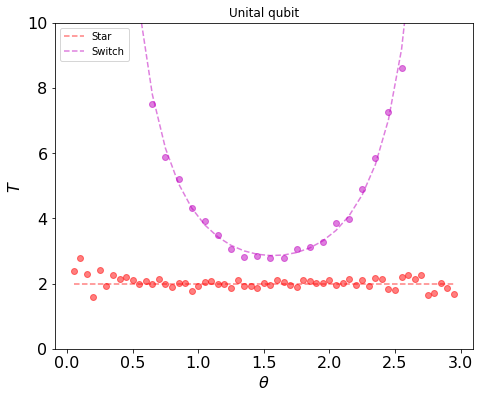

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7.5, 6.))
plt.plot(theta_list_star, 2*np.ones(len(theta_list_star)), 'r--', alpha = 0.5, label = 'Star')
plt.plot(theta_list_star, Tstar_list, 'ro', alpha = 0.5)
plt.plot(theta_list_switch, 20./7./np.sin(theta_list_switch)**2, 'm--', alpha = 0.5, label = 'Switch')
plt.plot(theta_list_switch, Tswitch_list, 'mo', alpha = 0.5)
plt.title('Unital qubit')
plt.xlabel(r'$\theta$', fontsize = 16)
plt.ylabel(r'$T$', fontsize = 16)
plt.tick_params(axis = 'x', labelsize = 16)
plt.tick_params(axis = 'y', labelsize = 16)
plt.ylim([0, 10])
plt.legend()



In [40]:
tau = 1
w = 1 # omega
g = 1 # gamma
theta_list_star = np.arange(0.35, 0.85*np.pi, 0.05)
target_state = '+'
ntimes = 1000
evolution = 'non-unital'
Tstar_list = []

for j in range(len(theta_list_star)):
    
    theta = theta_list_star[j]

    Ts = Tstar(theta, target_state, tau, w, g, evolution, ntimes)
    
    Tstar_list.append(Ts)

    print('theta:', round(theta, 4),'T*:', round(Ts, 4))

<ipython-input-33-5f814e680b76>:45: ComplexWarning: Casting complex values to real discards the imaginary part
  p[0] = np.dot(mp.conj().T, state)
<ipython-input-33-5f814e680b76>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  p[1] = np.dot(mm.conj().T, state)


theta: 0.35 T*: 29.4956
theta: 0.4 T*: 22.202
theta: 0.45 T*: 17.4656
theta: 0.5 T*: 15.1024
theta: 0.55 T*: 12.8509
theta: 0.6 T*: 9.5853
theta: 0.65 T*: 8.6934
theta: 0.7 T*: 7.374
theta: 0.75 T*: 6.4125
theta: 0.8 T*: 5.7613
theta: 0.85 T*: 5.3666
theta: 0.9 T*: 5.1949
theta: 0.95 T*: 4.4697
theta: 1.0 T*: 3.8505
theta: 1.05 T*: 3.6863
theta: 1.1 T*: 3.2542
theta: 1.15 T*: 3.0078
theta: 1.2 T*: 3.1396
theta: 1.25 T*: 2.7934
theta: 1.3 T*: 2.6861
theta: 1.35 T*: 2.5285
theta: 1.4 T*: 2.4064
theta: 1.45 T*: 2.0028
theta: 1.5 T*: 2.1317
theta: 1.55 T*: 1.8914
theta: 1.6 T*: 1.9325
theta: 1.65 T*: 1.8915
theta: 1.7 T*: 1.8131
theta: 1.75 T*: 1.8077
theta: 1.8 T*: 1.817
theta: 1.85 T*: 1.5687
theta: 1.9 T*: 1.5756
theta: 1.95 T*: 1.5995
theta: 2.0 T*: 1.5071
theta: 2.05 T*: 1.4046
theta: 2.1 T*: 1.3522
theta: 2.15 T*: 1.3565
theta: 2.2 T*: 1.1648
theta: 2.25 T*: 1.1718
theta: 2.3 T*: 1.2413
theta: 2.35 T*: 1.186
theta: 2.4 T*: 1.2554
theta: 2.45 T*: 1.0984
theta: 2.5 T*: 1.1174
theta: 2.

In [41]:
tau = 1
w = 1 # omega
g = 1 # gamma
theta_list_switch = np.arange(0.25, 0.85*np.pi, 0.1)
target_state = '+'
ntimes = 1000
evolution = 'non-unital'
Tswitch_list = []

for j in range(len(theta_list_switch)):
    
    theta = theta_list_switch[j]

    Ts = Tswitch(theta, target_state, tau, w, g, evolution, ntimes)
    
    Tswitch_list.append(Ts)

    print('theta:', round(theta, 4),'T-:', round(Ts, 4))

<ipython-input-33-5f814e680b76>:45: ComplexWarning: Casting complex values to real discards the imaginary part
  p[0] = np.dot(mp.conj().T, state)
<ipython-input-33-5f814e680b76>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  p[1] = np.dot(mm.conj().T, state)


theta: 0.25 T-: 107.1541
theta: 0.35 T-: 57.7682
theta: 0.45 T-: 34.715
theta: 0.55 T-: 23.4923
theta: 0.65 T-: 17.3533
theta: 0.75 T-: 13.0633
theta: 0.85 T-: 10.4905
theta: 0.95 T-: 8.9216
theta: 1.05 T-: 6.9398
theta: 1.15 T-: 6.2282
theta: 1.25 T-: 5.4898
theta: 1.35 T-: 4.7092
theta: 1.45 T-: 4.2112
theta: 1.55 T-: 3.8387
theta: 1.65 T-: 3.4612
theta: 1.75 T-: 3.2962
theta: 1.85 T-: 2.9052
theta: 1.95 T-: 2.7419
theta: 2.05 T-: 2.6714
theta: 2.15 T-: 2.4959
theta: 2.25 T-: 2.4446
theta: 2.35 T-: 2.2968
theta: 2.45 T-: 2.3001
theta: 2.55 T-: 2.2357
theta: 2.65 T-: 2.1172


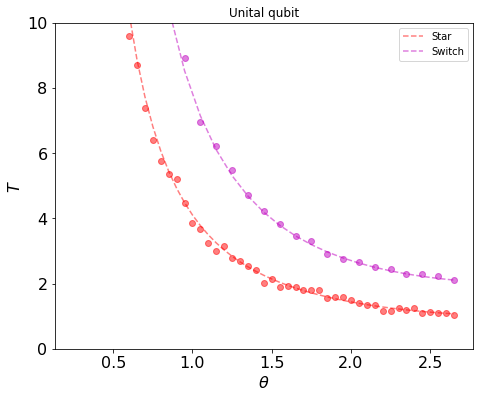

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7.5, 6.))
plt.plot(theta_list_star, (np.cos(2.*theta_list_star) - 27.)/(np.cos(theta_list_star) - 1.)/(14. + np.cos(theta_list_star)),
         'r--', alpha = 0.5, label='Star')
plt.plot(theta_list_star, Tstar_list, 'ro', alpha = 0.5)
plt.plot(theta_list_switch, 26./np.sin(theta_list_switch/2.)**2/(14. + np.cos(theta_list_switch)),
         'm--', alpha = 0.5, label='Switch')
plt.plot(theta_list_switch, Tswitch_list, 'mo', alpha = 0.5)
plt.title('Unital qubit')
plt.xlabel(r'$\theta$', fontsize = 16)
plt.ylabel(r'$T$', fontsize = 16)
plt.tick_params(axis = 'x', labelsize = 16)
plt.tick_params(axis = 'y', labelsize = 16)
plt.ylim([0, 10])
plt.legend()

